# ДЗ-2 Эконометрика

Работу выполнял Блохин Павел Сергеевич ЭАД222, id - 14

year = 2023

industry = НАУКА, КУЛЬТУРА

region = все

In [363]:
import polars as pl
import statsmodels.api as sm # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
import pandas as pd
df_hw = pd.read_csv('Homework_2_data.csv', sep=';')
year = 2023
industry = 'НАУКА, КУЛЬТУРА'
region = ''
if industry == '':
    my_data = (df_hw[(df_hw.year == year) & (df_hw.region == region)])
elif region == '':
    my_data = (df_hw[(df_hw.year == year) & (df_hw.industry == industry)])
my_data

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
9,Краснодар,2,"36,5",1,"НАУКА, КУЛЬТУРА",8,50000,1,1,0,1,0,78,170,0,2023
29,"Удмуртская Республика, Глазов и Глазовский район",2,"42,5",1,"НАУКА, КУЛЬТУРА",8,25000,0,1,0,1,1,"49,7",157,0,2023
92,"Волгоградская область, Руднянский район",2,"36,5",0,"НАУКА, КУЛЬТУРА",8,34000,0,1,0,1,0,84,176,0,2023
122,Казань,0,66,1,"НАУКА, КУЛЬТУРА",6,14000,0,1,1,1,0,70,157,0,2023
142,Курган,2,"49,5",1,"НАУКА, КУЛЬТУРА",8,17000,1,1,1,1,1,71,164,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,"Калужская область, Куйбышевский район",2,33,1,"НАУКА, КУЛЬТУРА",8,27000,1,1,1,1,1,62,155,0,2023
4487,"Тамбовская область, Уварово и Уваровский район",0,"61,5",1,"НАУКА, КУЛЬТУРА",8,15000,0,0,1,1,1,76,159,0,2023
4551,"Красноярский край, Назарово и Назаровский район",1,"29,5",1,"НАУКА, КУЛЬТУРА",8,30000,0,1,1,1,0,57,170,0,2023
4584,Москва,0,"42,5",1,"НАУКА, КУЛЬТУРА",8,44000,0,1,1,1,0,45,160,1,2023


In [365]:
df = pl.DataFrame(my_data) # хи-хи-хи я polars-bitch
df

region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
str,i64,str,i64,str,i64,str,i64,i64,i64,i64,i64,str,str,i64,i64
"""Краснодар""",2,"""36,5""",1,"""НАУКА, КУЛЬТУРА""",8,"""50000""",1,1,0,1,0,"""78""","""170""",0,2023
"""Удмуртская Республика, Глазов …",2,"""42,5""",1,"""НАУКА, КУЛЬТУРА""",8,"""25000""",0,1,0,1,1,"""49,7""","""157""",0,2023
"""Волгоградская область, Руднянс…",2,"""36,5""",0,"""НАУКА, КУЛЬТУРА""",8,"""34000""",0,1,0,1,0,"""84""","""176""",0,2023
"""Казань""",0,"""66""",1,"""НАУКА, КУЛЬТУРА""",6,"""14000""",0,1,1,1,0,"""70""","""157""",0,2023
"""Курган""",2,"""49,5""",1,"""НАУКА, КУЛЬТУРА""",8,"""17000""",1,1,1,1,1,"""71""","""164""",0,2023
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Калужская область, Куйбышевски…",2,"""33""",1,"""НАУКА, КУЛЬТУРА""",8,"""27000""",1,1,1,1,1,"""62""","""155""",0,2023
"""Тамбовская область, Уварово и …",0,"""61,5""",1,"""НАУКА, КУЛЬТУРА""",8,"""15000""",0,0,1,1,1,"""76""","""159""",0,2023
"""Красноярский край, Назарово и …",1,"""29,5""",1,"""НАУКА, КУЛЬТУРА""",8,"""30000""",0,1,1,1,0,"""57""","""170""",0,2023


## Задание 1

### Описание выборки:

На вход нам подаётся датасет из 119 наблюдений. Выборка содержатся полученные в ходе опроса наблюдения по домохозяйствам/индивидам, которые репрезентируют население России, работающее в сферах "НАУКА, КУЛЬТУРА" в 2023 году. Генеральной совокупностью являются жители РФ всех регионов, работающие в сферах "НАУКА, КУЛЬТУРА" в 2023 году.

### Проверка репрезентативности

Определите ключевые характеристики генеральной совокупности, которые важны для исследования (возраст, пол, доход, образование, география и т.д.)(это сделано).

Сравните распределения этих характеристик в выборке с известными данными о генеральной совокупности.

Убедитесь, что выборка сформирована случайным образом (тоесть чтобы не было такого что спросили только у одной группы населения, например только мажоры с рублёвки или работяги из посёлка под Хабаровском)(вроде выполнено, берём из всех доступных регонов всего опроса).

Проверка на отсутствие систематических смещений (например, если респонденты в опросе — только активные пользователи интернета, это не отражает мнение всех возрастных групп)(у нас есть пунктик про пользование интернета, такчто вроде ок).

## Задание 2

Исправляем формат данных, кто **** числа в стрингах зписыает???!!!

In [366]:
df = df.with_row_index()
df = df.with_columns(
    pl.col('age').str.replace(',', '.'), 
    pl.col('wage').str.replace(',', '.'), 
    pl.col('weight').str.replace(',', '.'), 
    pl.col('height').str.replace(',', '.')
)
df = df.with_columns(
    pl.col('age').cast(pl.Float64),
    pl.col('wage').cast(pl.Float64),
    pl.col('weight').cast(pl.Float64),
    pl.col('height').cast(pl.Float64)
)
df

index,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
u32,str,i64,f64,i64,str,i64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64
0,"""Краснодар""",2,36.5,1,"""НАУКА, КУЛЬТУРА""",8,50000.0,1,1,0,1,0,78.0,170.0,0,2023
1,"""Удмуртская Республика, Глазов …",2,42.5,1,"""НАУКА, КУЛЬТУРА""",8,25000.0,0,1,0,1,1,49.7,157.0,0,2023
2,"""Волгоградская область, Руднянс…",2,36.5,0,"""НАУКА, КУЛЬТУРА""",8,34000.0,0,1,0,1,0,84.0,176.0,0,2023
3,"""Казань""",0,66.0,1,"""НАУКА, КУЛЬТУРА""",6,14000.0,0,1,1,1,0,70.0,157.0,0,2023
4,"""Курган""",2,49.5,1,"""НАУКА, КУЛЬТУРА""",8,17000.0,1,1,1,1,1,71.0,164.0,0,2023
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
114,"""Калужская область, Куйбышевски…",2,33.0,1,"""НАУКА, КУЛЬТУРА""",8,27000.0,1,1,1,1,1,62.0,155.0,0,2023
115,"""Тамбовская область, Уварово и …",0,61.5,1,"""НАУКА, КУЛЬТУРА""",8,15000.0,0,0,1,1,1,76.0,159.0,0,2023
116,"""Красноярский край, Назарово и …",1,29.5,1,"""НАУКА, КУЛЬТУРА""",8,30000.0,0,1,1,1,0,57.0,170.0,0,2023


In [367]:
columns = ['educ', 'age', 'female', 'work_hours', 'wage', 'foreign_language', 'internet', 'alcohol', 'is_children', 'health', 'weight', 'height', 'smoke']
df_min = df.select(
    pl.col(column).min().alias(column) for column in columns
)
df_max = df.select(
    pl.col(column).max().alias(column) for column in columns
)
df_mean = df.select(
    pl.col(column).mean().alias(column) for column in columns
)
df_std = df.select(
    pl.col(column).std().alias(column) for column in columns
)
df_range = df.select(
    (pl.col(column).max() - pl.col(column).min()).alias(column) for column in columns
)

Минимальные значения:

In [368]:
df_min

educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,f64,f64,i64
0,26.0,0,2,8000.0,0,0,0,1,0,45.0,145.0,0


Максимальные значения:

In [369]:
df_max

educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,f64,f64,i64
2,84.5,1,24,150000.0,1,1,1,1,1,125.0,196.0,1


Средние значения:

In [370]:
df_mean

educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.201681,49.407563,0.773109,7.932773,35538.655462,0.235294,0.957983,0.638655,1.0,0.268908,74.812605,166.135294,0.193277


Мне не нравится что все с детьми (средняя = 1), я не пропагандирую чайлдфри, но модель будет не оч репрезентативна

Стандартное отклонение в признаках:

In [371]:
df_std

educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.829333,12.125049,0.420592,3.475656,27792.847846,0.425976,0.201476,0.482421,0.0,0.445267,15.016068,9.088376,0.396538


Размах в признаках

In [372]:
df_range

educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,f64,f64,i64
2,58.5,1,22,142000.0,1,1,1,0,1,80.0,51.0,1


## Задание 3

In [373]:
columns_count = ['age', 'work_hours', 'wage', 'weight', 'height']
df_q1 = df.select(
    pl.col(column).quantile(0.25).alias(f"{column}_Q1") for column in columns_count
)
df_q2 = df.select(
    pl.col(column).quantile(0.50).alias(f"{column}_Q2") for column in columns_count
)
df_q3 = df.select(
    pl.col(column).quantile(0.75).alias(f"{column}_Q3") for column in columns_count
)
df_iqr = df.select(
    (pl.col(column).quantile(0.75) - pl.col(column).quantile(0.25)).alias(f"{column}_IQR") for column in columns_count
)

Квантиль уровня 25% для численных признаков

In [374]:
df_q1

age_Q1,work_hours_Q1,wage_Q1,weight_Q1,height_Q1
f64,f64,f64,f64,f64
38.0,7.0,17800.0,64.0,160.0


Квантиль уровня 50% для численных признаков

In [375]:
df_q2

age_Q2,work_hours_Q2,wage_Q2,weight_Q2,height_Q2
f64,f64,f64,f64,f64
49.5,8.0,26000.0,73.0,165.0


Квантиль уровня 75% для численных признаков

In [376]:
df_q3

age_Q3,work_hours_Q3,wage_Q3,weight_Q3,height_Q3
f64,f64,f64,f64,f64
58.5,8.0,40000.0,84.0,170.0


Межквантильный размах для численных признаков

In [377]:
df_iqr

age_IQR,work_hours_IQR,wage_IQR,weight_IQR,height_IQR
f64,f64,f64,f64,f64
20.5,1.0,22200.0,20.0,10.0


In [418]:
stats = df.select([column for column in columns]).describe()
stats

statistic,educ,age,female,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.201681,49.407563,0.773109,7.932773,35538.655462,0.235294,0.957983,0.638655,1.0,0.268908,74.812605,166.135294,0.193277
"""std""",0.829333,12.125049,0.420592,3.475656,27792.847846,0.425976,0.201476,0.482421,0.0,0.445267,15.016068,9.088376,0.396538
"""min""",0.0,26.0,0.0,2.0,8000.0,0.0,0.0,0.0,1.0,0.0,45.0,145.0,0.0
"""25%""",0.0,38.0,1.0,7.0,17800.0,0.0,1.0,0.0,1.0,0.0,64.0,160.0,0.0
"""50%""",1.0,49.5,1.0,8.0,26000.0,0.0,1.0,1.0,1.0,0.0,73.0,165.0,0.0
"""75%""",2.0,58.5,1.0,8.0,40000.0,0.0,1.0,1.0,1.0,1.0,84.0,170.0,0.0
"""max""",2.0,84.5,1.0,24.0,150000.0,1.0,1.0,1.0,1.0,1.0,125.0,196.0,1.0


короче я вообще зря всё делал, есть просто функция describe, класс, ну размах и квантильный размах она не считает, но я их посчитал лол. Задание 3-4 одной строчкой

## Задание 4

In [379]:
df_mean.select(
    pl.col(column).alias(f'{column}_MEAN') for column in columns_count
)

age_MEAN,work_hours_MEAN,wage_MEAN,weight_MEAN,height_MEAN
f64,f64,f64,f64,f64
49.407563,7.932773,35538.655462,74.812605,166.135294


In [380]:
df_q2

age_Q2,work_hours_Q2,wage_Q2,weight_Q2,height_Q2
f64,f64,f64,f64,f64
49.5,8.0,26000.0,73.0,165.0


Квантиль 50% - медиана

In [381]:
df_mode = df.select(
    pl.col(column).mode().first().alias(f'{column}_MODE') for column in columns_count
)
df_mode

age_MODE,work_hours_MODE,wage_MODE,weight_MODE,height_MODE
f64,i64,f64,f64,f64
36.5,8,40000.0,68.0,164.0


**Краткий вывод:** 

часы работы, рост и вес имеют симитричное распределение ($mean \approx mode \approx median$)

Зарплата: $mode > mean > median$ -> левосторонняя асимметрия, в левом хвосте есть выбросы ($mean > median$)

Возраст: $mean \approx median > mode$ -> правосторонняя асимметрия (небольшая), в правом хвосет могут быть выбросы, но $mean \approx median$, такчто шанс маленький

## Задание 5

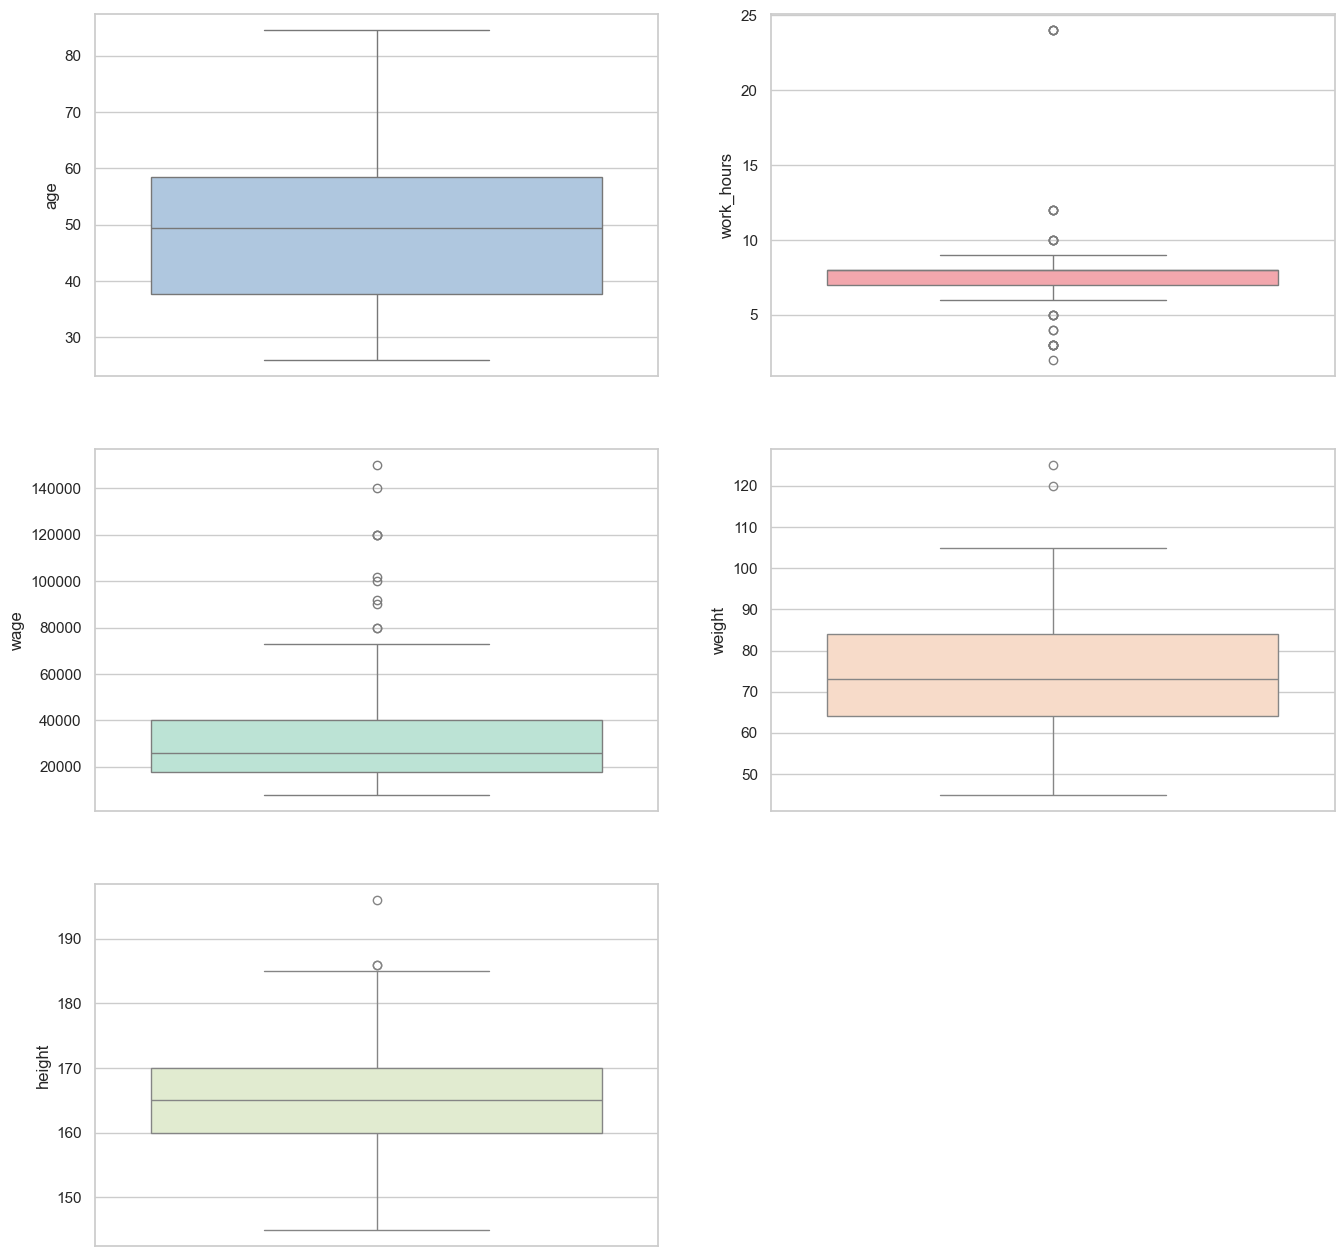

In [382]:
sns.set_theme(style='whitegrid')
sns.set_palette(sns.color_palette("Set2"))
fig, ax = plt.subplots(3, 2, figsize=(16, 16))
sns.boxplot(
    data=df,
    y='age',
    ax=ax[0, 0],
    color="#A7C7E7"
)
sns.boxplot(
    data=df,
    y='work_hours',
    ax=ax[0, 1],
    color="#FF9AA2"
)
sns.boxplot(
    data=df,
    y='wage',
    ax=ax[1, 0],
    color="#B5EAD7"
)
sns.boxplot(
    data=df,
    y='weight',
    ax=ax[1, 1],
    color="#FFDAC1"
)
sns.boxplot(
    data=df,
    y='height',
    ax=ax[2, 0],
    color="#E2F0CB"
)
ax[2, 1].remove()


выбросы есть

## Задание 6

### Гистограммы распределения

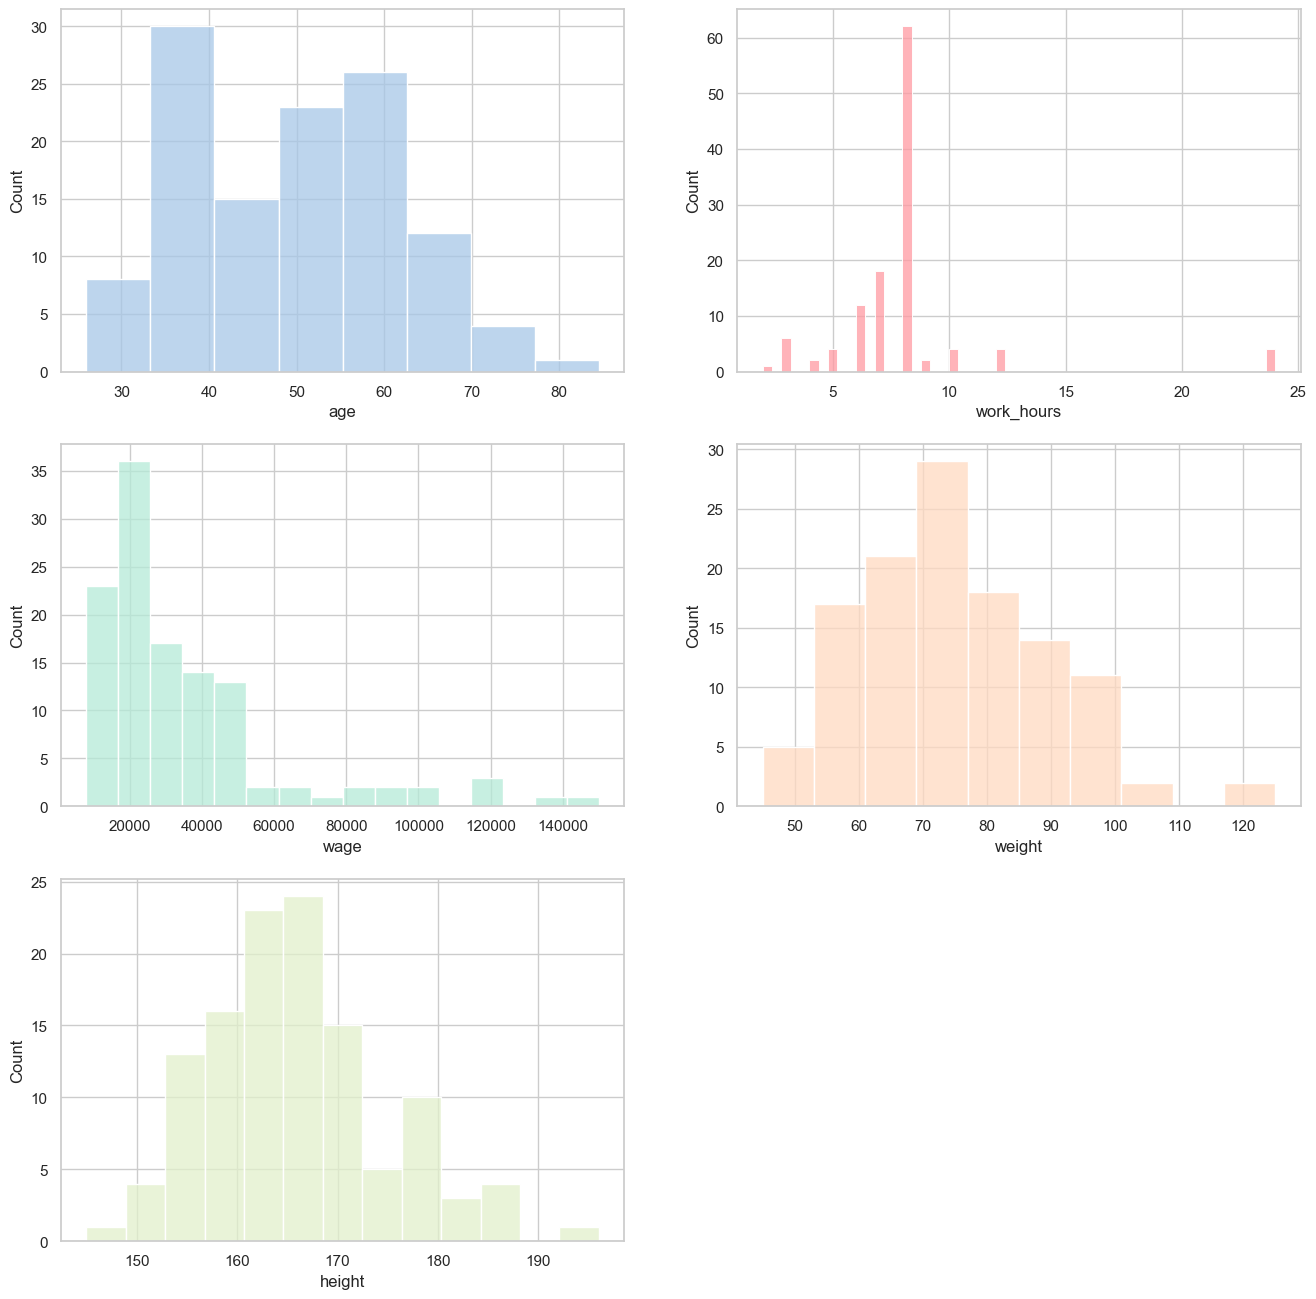

In [383]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))
sns.histplot(
    data=df,
    x='age',
    ax=ax[0, 0],
    color="#A7C7E7"
)
sns.histplot(
    data=df,
    x='work_hours',
    ax=ax[0, 1],
    color="#FF9AA2"
)
sns.histplot(
    data=df,
    x='wage',
    ax=ax[1, 0],
    color="#B5EAD7"
)
sns.histplot(
    data=df,
    x='weight',
    ax=ax[1, 1],
    color="#FFDAC1"
)
sns.histplot(
    data=df,
    x='height',
    ax=ax[2, 0],
    color="#E2F0CB"
)
ax[2, 1].remove()

**Краткий вывод:** 
1. Симметричность
Как и предполагалось выше (почти верно), по графикам видно:

Возраст, рост и вес примерно симметричны, с небольшими хвостами справа

Зарплата скошена вправо (справа хвост)

Рабочие часы скошены вроде влево?, но есть выбросы далеко справа поэтому наверно хвост правосторонний

2. Островершинность

Рабочие часы и зарплата определенно островершинные

Рост и вес вроде тоже? но не сильно

Возраст туповершинный

Проверим это на циферках

### Skewness и Kurtosi

In [384]:
from scipy.stats import skew, kurtosis

ske_kur = {'Feature': columns_count, 'Skewness' : [], 'Kurtosi': []}
for column in columns_count:
    ske_kur["Skewness"].append(skew(df[column]))
    ske_kur["Kurtosi"].append(kurtosis(df[column], fisher=True))
    
res = pl.DataFrame(ske_kur)
print(res)


shape: (5, 3)
┌────────────┬──────────┬───────────┐
│ Feature    ┆ Skewness ┆ Kurtosi   │
│ ---        ┆ ---      ┆ ---       │
│ str        ┆ f64      ┆ f64       │
╞════════════╪══════════╪═══════════╡
│ age        ┆ 0.223478 ┆ -0.700189 │
│ work_hours ┆ 3.171247 ┆ 13.017113 │
│ wage       ┆ 2.100988 ┆ 4.452849  │
│ weight     ┆ 0.565339 ┆ 0.348146  │
│ height     ┆ 0.525942 ┆ 0.28651   │
└────────────┴──────────┴───────────┘


Собсвенно, что и говорил про графики, оказалось верно и по таблице

## Задание 7

<Axes: xlabel='educ', ylabel='Count'>

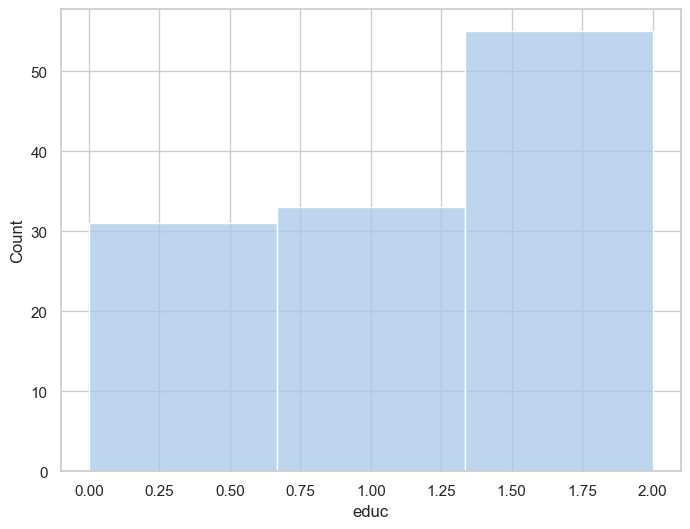

In [385]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=df,
    x='educ',
    color="#A7C7E7",
    ax=ax,
    bins=3
)

ну вот какое то такое распределение, выводы буду делать в отчёте, образованные победили

## Задание 8

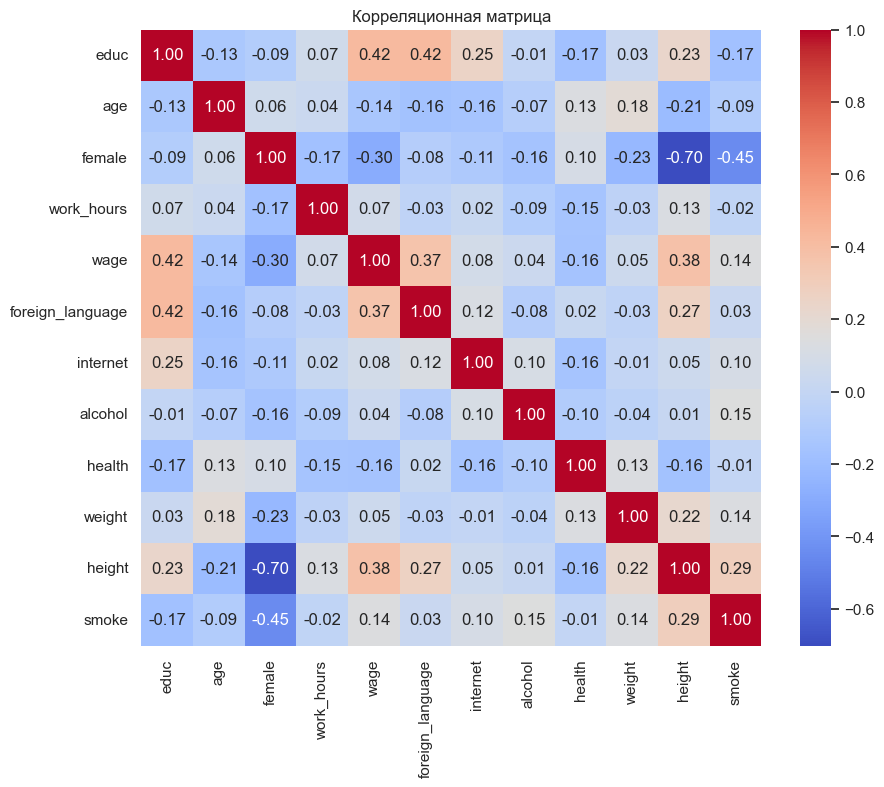

In [386]:
cor = df.select(
    ['educ', 'age', 'female', 'work_hours', 'wage', 'foreign_language', 'internet', 'alcohol', 'health', 'weight', 'height', 'smoke']
).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    cor, 
    cmap="coolwarm", 
    fmt=".2f", 
    annot=True,
    xticklabels=cor.columns,
    yticklabels=cor.columns
)
plt.title("Корреляционная матрица")
plt.show()

Смею предположить, что мы будем прогнозировать зп, с ней больше всего коррелируют образование, что в научной сфере как бы ок, знание английского тоже правда, многие стаитьи на английском пишутся, также пол (женщин не оч любят в науке видимо) и какого-то не понятно для меня рост, ну высоких людей любят больше 

## Задание 9

In [387]:
df_educ = df.with_columns(
    pl.when(pl.col('educ') == 0).then(pl.lit('Школа')).
    when(pl.col('educ') == 1).then(pl.lit('ПТУ, тех. училище')).
    otherwise(pl.lit('Институт, университет, академия')).alias('educ')
)
df_sex = df.with_columns(
    pl.when(pl.col('female') == 0).then(pl.lit('мужской')).
    otherwise(pl.lit('женский')).alias('sex')
)

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_88919/3800454205.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


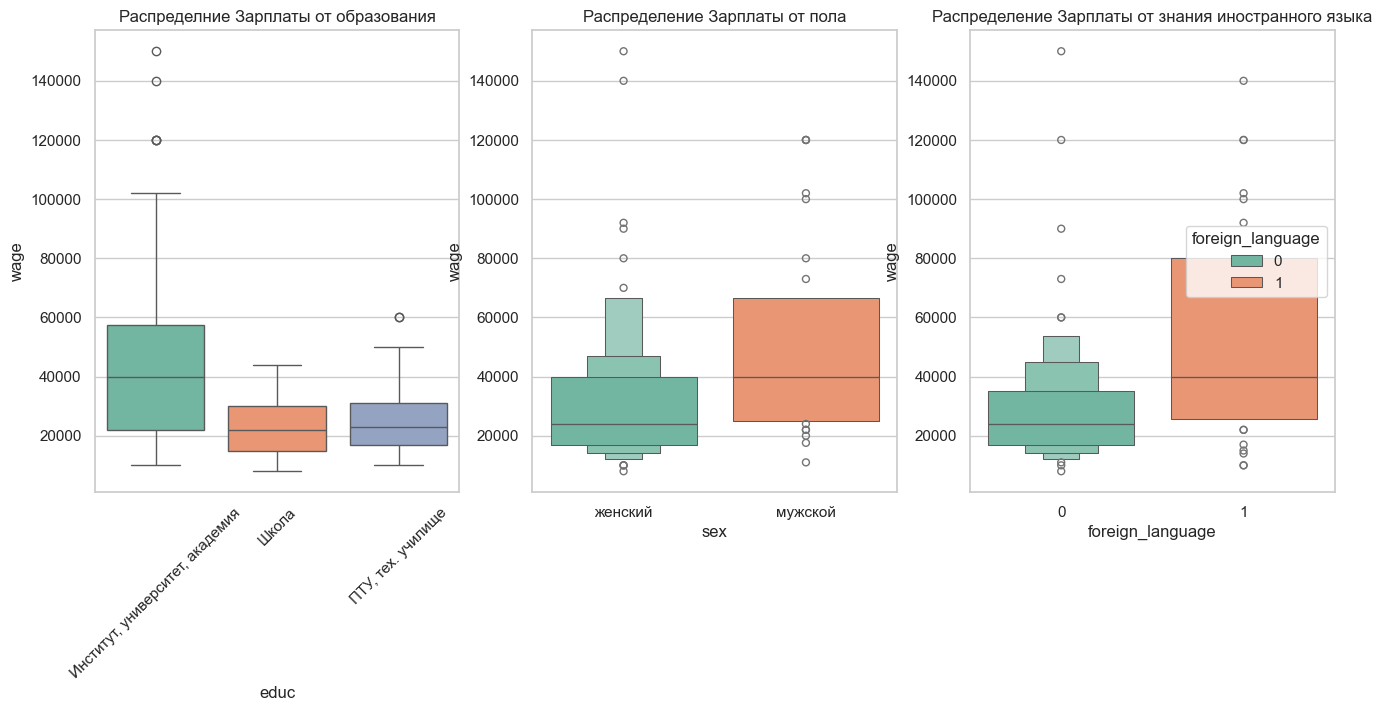

In [388]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.boxplot(
    data=df_educ,
    x='educ',
    y='wage',
    hue='educ',
    ax=ax[0]
).set_title('Распределние Зарплаты от образования')
sns.boxenplot(
    data=df_sex,
    x='sex',
    y='wage',
    hue='sex',
    ax=ax[1]
).set_title('Распределение Зарплаты от пола')
sns.boxenplot(
    data=df,
    x='foreign_language',
    y='wage',
    hue='foreign_language',
    ax=ax[2]
).set_title('Распределение Зарплаты от знания иностранного языка')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
plt.show()

Для образования видно, что у образованных работающих в сфере "Наука и культура" "вилка" гораздо больше, в среднем они заробатывают больше и есть исключения, которые заробатывают прям много

График для female и foreign_language работает плохо

Возможные причины:

1. Малое количество данных:

    Если для категории female = 1 и foreign_language = 1 мало данных, это может привести к сжатой или "шумной" визуализации.

2. Проблемы с выбросами:

    Наличие выбросов сильно влияет на визуализацию распределений, особенно в boxplot или boxenplot.

3. Повторяющиеся значения:

    Если в данных для female = 1 и foreign_language = 1 много одинаковых значений, график может выглядеть "компрессированным", так как медиана, квартили и точки выбросов совпадают.

4. Слишком высокая плотность:

    Если значения распределены в узком диапазоне, boxenplot может визуализировать это с "группировкой" областей, что делает график неинформативным.

Честно... в первые вижу почему ящик с усами может так выглядеть, поэтому спросил у гпт что можно сделать, ну и нашёл потом график, на который не влияют данные проблемы, потому что данных оч мало, выбросы пока удалять нельзя

In [389]:
print(df.filter((pl.col('female') == 1)).select('wage').describe())

shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ wage         │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 92.0         │
│ null_count ┆ 0.0          │
│ mean       ┆ 31105.434783 │
│ std        ┆ 24101.093697 │
│ min        ┆ 8000.0       │
│ 25%        ┆ 17000.0      │
│ 50%        ┆ 24000.0      │
│ 75%        ┆ 40000.0      │
│ max        ┆ 150000.0     │
└────────────┴──────────────┘


In [390]:
print(df.filter((pl.col('foreign_language') == 0)).select('wage').describe())

shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ wage         │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 91.0         │
│ null_count ┆ 0.0          │
│ mean       ┆ 29915.384615 │
│ std        ┆ 21534.220431 │
│ min        ┆ 8000.0       │
│ 25%        ┆ 17000.0      │
│ 50%        ┆ 24000.0      │
│ 75%        ┆ 35000.0      │
│ max        ┆ 150000.0     │
└────────────┴──────────────┘


могу предположить, что это из-за огромной дисперсии

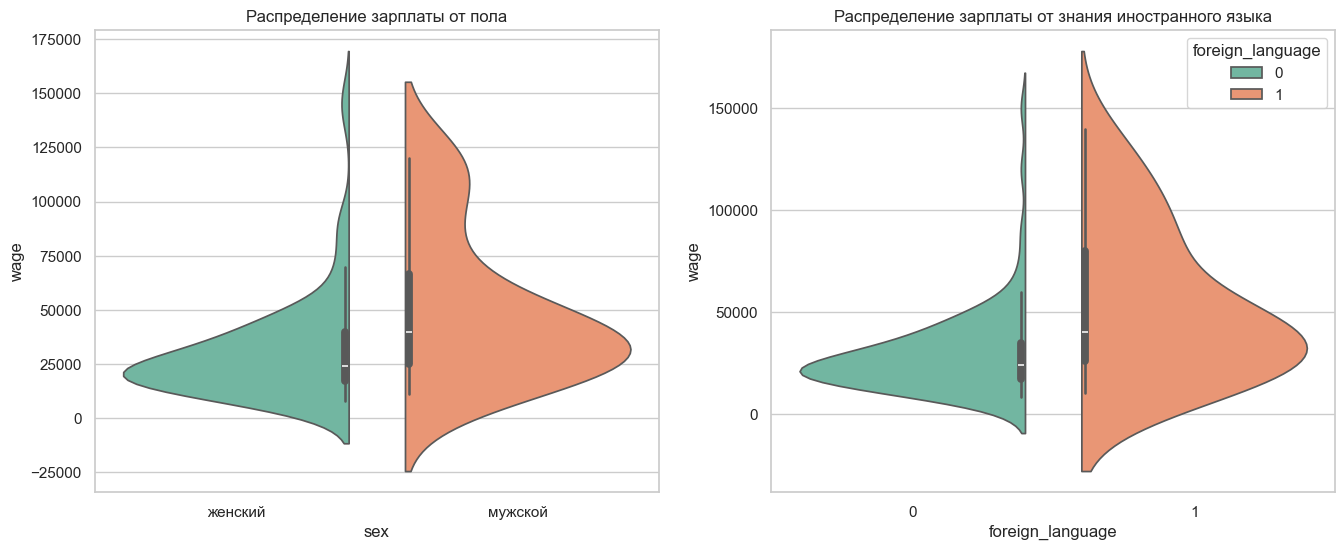

In [420]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.violinplot(
    data=df_sex, 
    x='sex', 
    y='wage', 
    hue='sex', 
    split=True,
    ax=ax[0]
).set_title('Распределение зарплаты от пола')
sns.violinplot(
    data=df,
    x='foreign_language',
    y='wage',
    hue='foreign_language',
    split=True,
    ax=ax[1]
).set_title('Распределение зарплаты от знания иностранного языка')
plt.show()

ну вот здесь уже лучше всё видно, менее очевидны выобросы, но в целом норм, у мужчин медиана выше, IQR шире, ну срденее по графику с усами видно, что у мужчин оно больше

зарплаты людей владеющих иностарнным языком в срднем больше, также они выходят на высокие зп, медиана выше

На самом деле не оч репрезентативно смотреть на эти данные, поскольку женщин тут 92 из 119 опрошенных, и людей, не владющих иностранным языком, 91 из 119, это плохо

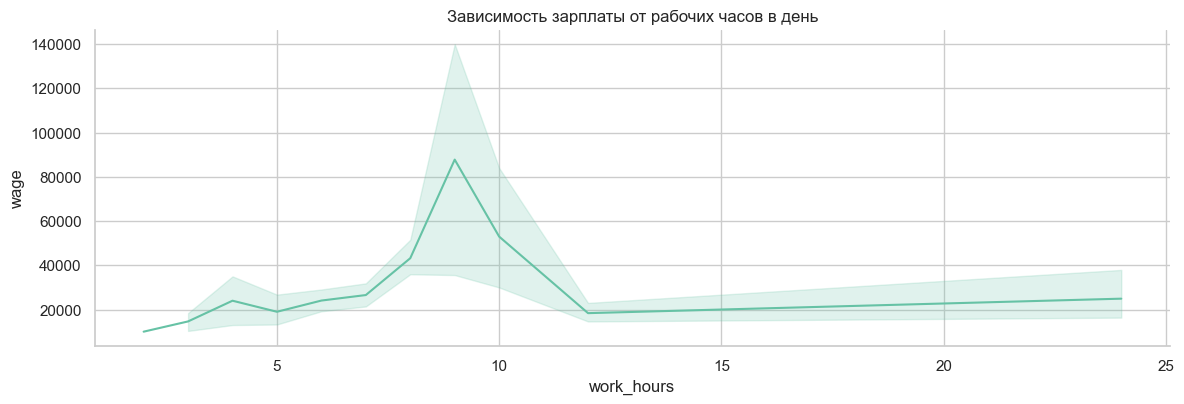

In [392]:
sns.relplot(
    data=df,
    x='work_hours',
    y='wage',
    kind='line',
    height=4,
    aspect=3
).set(title='Зависимость зарплаты от рабочих часов в день')

In [393]:
df.group_by('work_hours').agg(pl.col('index').count()).filter(pl.col('work_hours') >= 8).sort(pl.col('work_hours'))

work_hours,index
i64,u32
8,62
9,2
10,4
12,4
24,4


А что за психи, работающией 24 часа в день, ещё и за маленькую зп... мне кажется это подопытные в сфере Наука, не ну капец (выбросы надебсь... или ошибки)

Ну вполне логичное заключение, что чем больше работаешь - больше получаешь, всё логично

Единсвенное, у людей с рабочим днём в 8-11 часов, очень большая дисперсия (бледно-зелёный), но это скорее из-за меленького количества данных

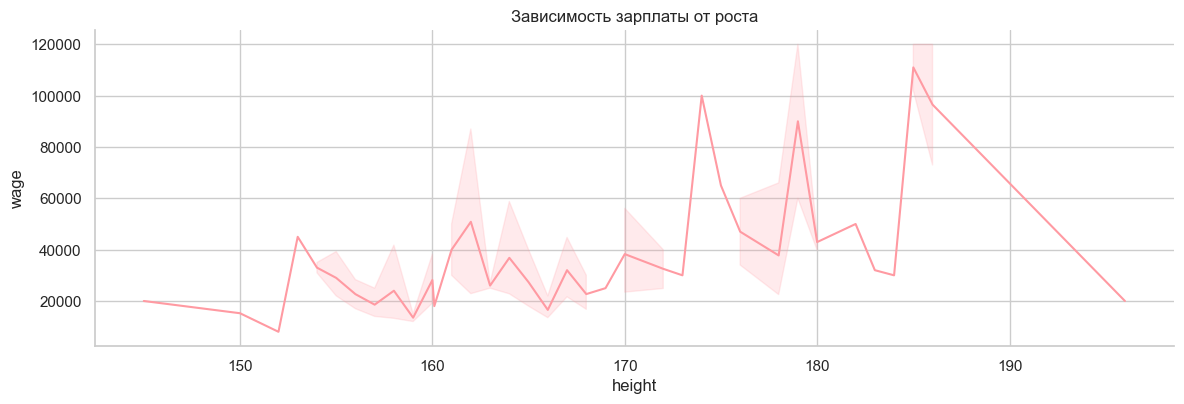

In [394]:
sns.relplot(
    data=df,
    x='height',
    y='wage',
    kind='line',
    height=4,
    aspect=3,
    color="#FF9AA2"
).set(title='Зависимость зарплаты от роста')

удивительная для меня зависимость, проверил из-за большой корреляции, да есть восходящий тренд (очень странный), нормальной зависимоти нет, но почему-то у высоких людей зп немного выше, это очень странно, скорее всего это просто случайность, ну либо высоких любят больше

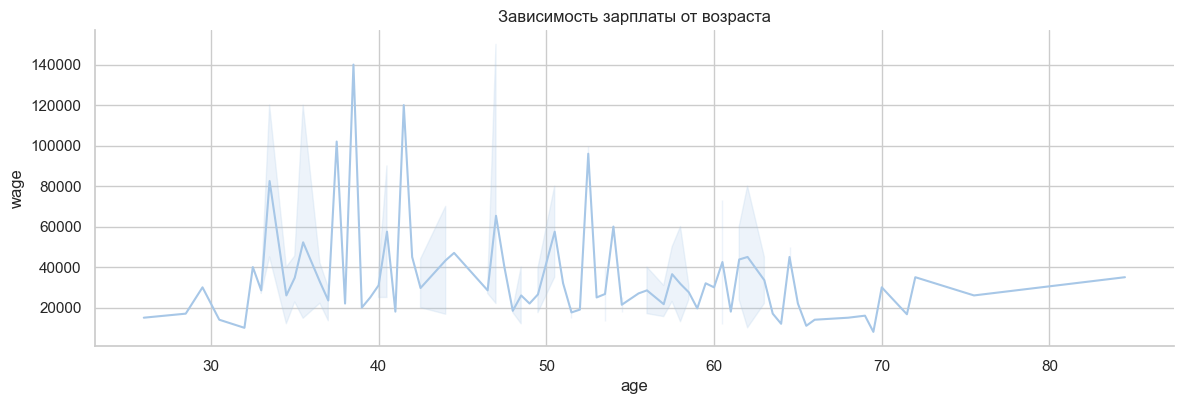

In [395]:
sns.relplot(
    data=df,
    x='age',
    y='wage',
    kind='line',
    height=4,
    aspect=3,
    color="#A7C7E7"
).set(title='Зависимость зарплаты от возраста')

В целом зависимости прям такой нет, но после $\approx$ 33 лет зарплата выше, ну потому что опыт и всё такое, дальше зп колеблятся и с 65 лет падают (дорогу молодым?)

In [396]:
df.select(pl.col('region')).unique()

region
str
"""Новосибирская область, Бердски…"
"""Тамбовская область, Уварово и …"
"""Смоленск"""
"""Челябинск"""
"""Ставропольский край, Георгиевс…"
…
"""Курган"""
"""Оренбургская область, Орск"""
"""Красноярский край, Назарово и …"


<function matplotlib.pyplot.show(close=None, block=None)>

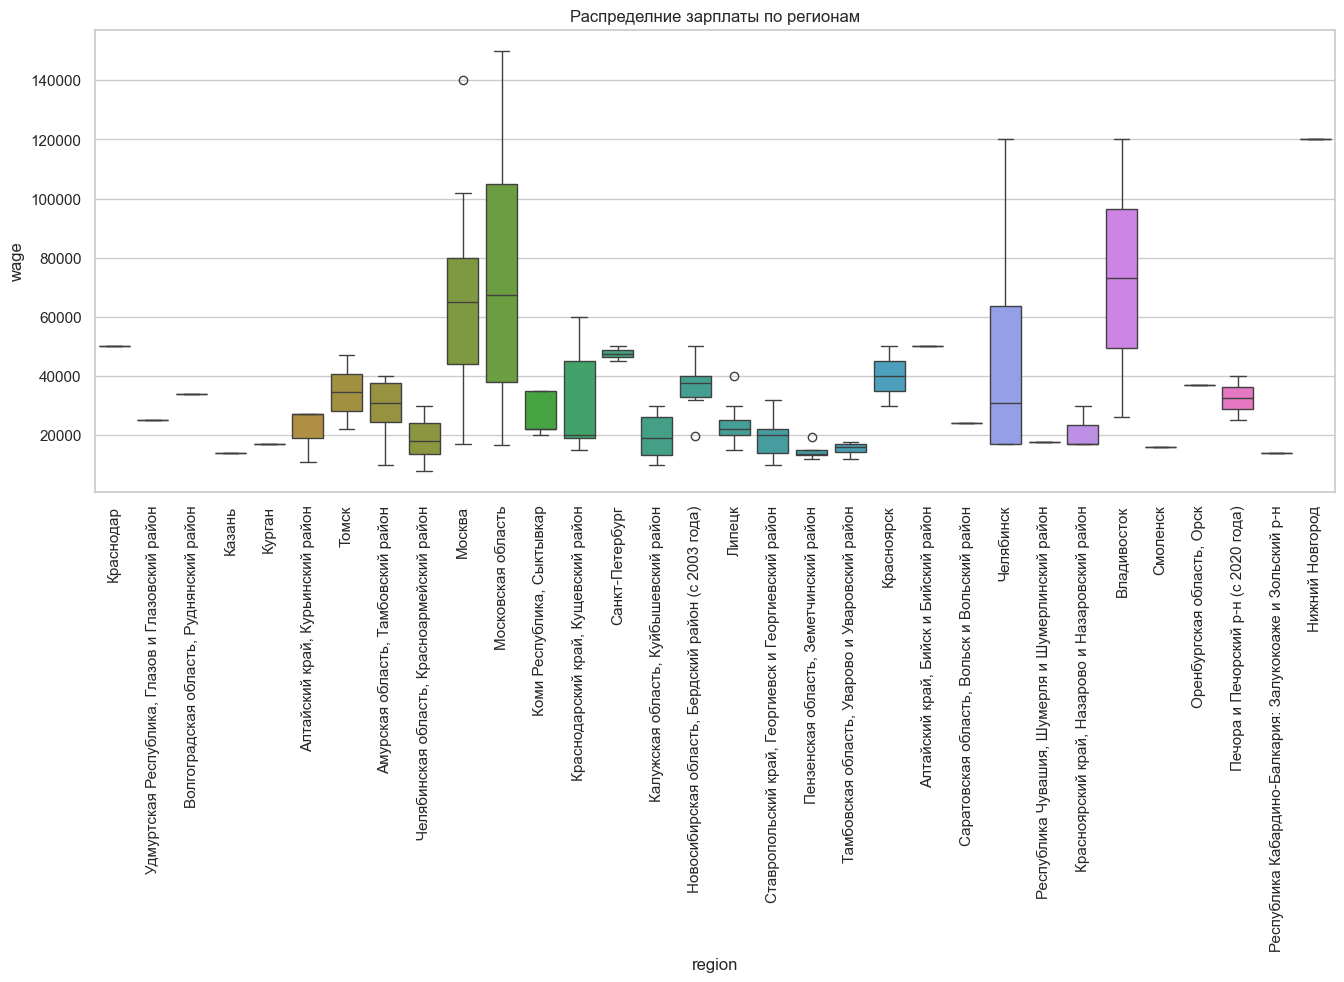

In [397]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(
    data=df,
    x='region',
    y='wage',
    hue='region'
).set_title('Распределние зарплаты по регионам')
plt.xticks(rotation=90)
plt.show

## Задание 10

### Оцениваем линейную модель

In [398]:
import statsmodels.api as sm

df = df.with_columns(
    pl.when(pl.col('educ') == 2).then(1).
    otherwise(0).alias('high')
)
X = df.select(pl.col('age'), pl.col('high'), pl.col('female'), pl.col('is_children'), pl.col('smoke')).to_pandas()
X = sm.add_constant(X)
y = df.select(pl.col('wage')).to_pandas()

model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     10.72
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.08e-07
Time:                        20:33:13   Log-Likelihood:                -1367.0
No. Observations:                 119   AIC:                             2744.
Df Residuals:                     114   BIC:                             2758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age          -128.8333    186.065     -0.692      

In [399]:
print(model_1.params.index)

Index(['age', 'high', 'female', 'is_children', 'smoke'], dtype='object')


In [400]:
coefficients = model_1.params

# Формируем уравнение модели
equation = f"wage = "
for variable, coef in coefficients.items():
    equation += f" + ({coef:.2f}) * {variable}"

# Выводим уравнение
print("Уравнение модели:")
print(equation)

Уравнение модели:
wage =  + (-128.83) * age + (23795.93) * high + (-14656.42) * female + (40889.57) * is_children + (6970.94) * smoke


Константы нет, думаю потому что is_children работает как константа, ведь в данных там везде 1

In [401]:
X_check = df.select(pl.col('age'), pl.col('high'), pl.col('female'), pl.col('smoke')).to_pandas()
X_check = sm.add_constant(X_check)
y = df.select(pl.col('wage')).to_pandas()

model_check = sm.OLS(y, X_check).fit()
print(model_check.params.index)

Index(['const', 'age', 'high', 'female', 'smoke'], dtype='object')


Собственно да, я был прав

Краткий вывод:

Значимыми оказались: наличие высшего образования, пол, наличие детей (константа в модели)

Незначимые: возраст, курение

### Интерпретация 

При увеличении возраста на один год, зарплата уменьшится примерно на 128.83 рублей

При наличии высшего образования, зарплата увеличится примерно на 23795.93 рублей

Если ваш пол женский, зарплата уменьшается примерно на 14656.42 рублей

Если у вас есть хотя бы один ребёнок, зарплата увеличится примерно на 40889.57 рублей

Если вы курите, зарплата увеличится примерно на 6970.94 рублей

Очень странная модель, но ладно

## Задание 11

In [402]:
from scipy.stats import f
n = len(y)  # Число наблюдений
k = len(model_1.params)  # Число параметров (включая константу)
r_squared = model_1.rsquared  # R^2 модели

# Рассчитываем F-статистику
F_stat = (r_squared / (k - 1)) / ((1 - r_squared) / (n - k))
p_value = 1 - f.cdf(F_stat, dfn=(k - 1), dfd=(n - k))

print(f"F-статистика: {F_stat:.4f}")
print(f"p-value для F-статистики: {p_value:.4f}")

F-статистика: 10.7178
p-value для F-статистики: 0.0000


Получаем те же результаты что и в таблице, модель значима

## Задание 12

Проверим гепотизу, о том, что age = 120

In [403]:
from scipy.stats import t

beta_age = model_1.params['age']  # Оценка коэффициента для age
std_err_age = model_1.bse['age']  # Стандартная ошибка для age
beta_0 = 120  # гипотеза, возраст даёт нам больше зп

# Рассчитываем t-статистику
t_stat = (beta_age - beta_0) / std_err_age
n = len(y)  # Число наблюдений
k = len(model_1.params)  # Число параметров (включая константу)
dff = n - k  # Степени свободы

p_value = 2 * (1 - t.cdf(abs(t_stat), df=dff))
print(f"p-value: {p_value:.4f}")
print(f"t-статистика: {t_stat:.4f}")

p-value: 0.1838
t-статистика: -1.3373


Гипотезу не принимаем, не отвергаем альтернативную, что не равна 120

## Задание 13

Проверим гипотезу о том что feamle + smoke = -10000

In [404]:
from scipy.stats import t
import numpy as np

beta_female = model_1.params['female']
beta_smoke = model_1.params['smoke']
cov_matrix = model_1.cov_params()
sum_beta = beta_female + beta_smoke
beta0_sum = -10000

var_female = cov_matrix.loc['female', 'female']
var_smoke = cov_matrix.loc['smoke', 'smoke']
cov_female_smoke = cov_matrix.loc['female', 'smoke']
std_err_sum = np.sqrt(var_female + var_smoke + 2 * cov_female_smoke)

t_stat = (sum_beta - beta0_sum) / std_err_sum
dff = model_1.df_resid  
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=dff))
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-статистика: 0.2187
p-value: 0.8273


Нашу гипотезу не отвергаем

P.S более подробно я расписал в отчете

## Задание 14

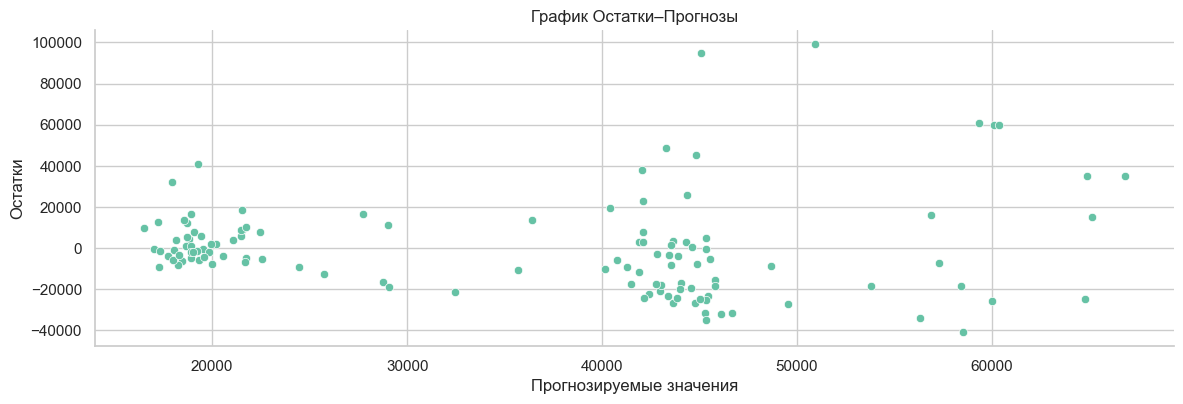

In [405]:
residuals = model_1.resid  # Остатки модели
predictions = model_1.fittedvalues  # Прогнозируемые значения

sns.relplot(
    y=residuals,
    x=predictions,
    kind='scatter',
    height=4,
    aspect=3
).set(xlabel="Прогнозируемые значения", ylabel="Остатки", title='График Остатки–Прогнозы')

Для меньших прогнозов (до 20,000) остатки более компактны и хаотичны, что может говорить о гомоскедастичности в этой области.
Однако для более высоких прогнозов (> 30,000) остатки начинают проявлять некоторые выбросы и смещение вниз. Это может указывать на гетероскедастичность.

На графике остатки распределены относительно хаотично, но можно заметить, что для высоких прогнозов (от 50,000 и выше) остатки концентрируются ниже линии
y = 0, что может указывать на недооценку модели для больших значений.

Text(0.5, 1.0, 'Распределение остатоков')

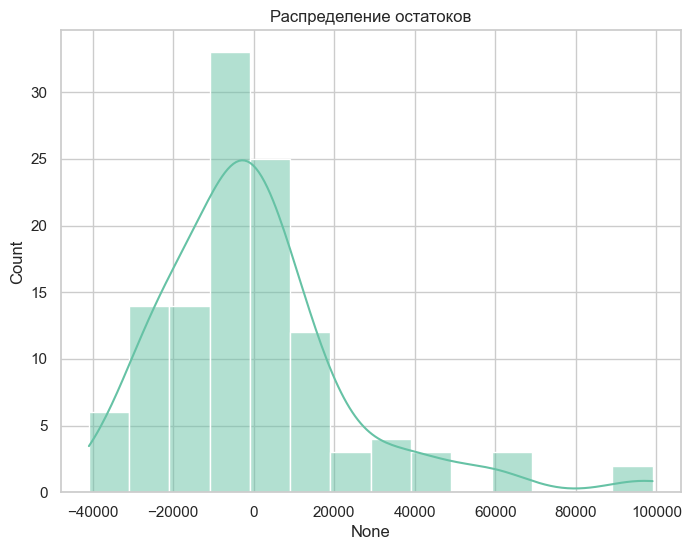

In [406]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    x=residuals,
    kde=True,
    ax=ax
).set_title('Распределение остатоков')

На графике видно, что распределение смещено вправо (положительная асимметрия), что говорит о нарушении предположения нормальности.



## Задание 15

In [407]:
X = df.select(pl.col('high'), pl.col('female'), pl.col('is_children')).to_pandas()
X = sm.add_constant(X)
y = df.select(pl.col('wage')).to_pandas()

model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.55
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.30e-08
Time:                        20:33:14   Log-Likelihood:                -1368.0
No. Observations:                 119   AIC:                             2742.
Df Residuals:                     116   BIC:                             2750.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
high         2.321e+04   4437.229      5.231      

In [408]:
coefficients2 = model_2.params

# Формируем уравнение модели
equation2 = f"wage = "
for variable, coef in coefficients2.items():
    equation2 += f" + ({coef:.2f}) * {variable}"

# Выводим уравнение
print("Уравнение модели:")
print(equation2)

Уравнение модели:
wage =  + (23209.30) * high + (-17847.83) * female + (38609.99) * is_children


Ну опишу тут коротко:

$R^2$ у новой модели упал на 1 сотую (уменьшили число признаков, это норм) $R^2_{adj}$ увеличился на 1 тысячную, значит тут признаки более значимы

AIC и BIC упали, стало лучше

Prob F упал почти в 10 раз, стало лучше. Модель с большей вероятностью значима

## Задание 16


Будем смотреть на стьюдентизированные остатки и DFFITS

In [409]:
influence = model_1.get_influence()
standardized_residuals = influence.resid_studentized_internal  # Стьюдентизированные остатки
leverage = influence.hat_matrix_diag  # Диагональные элементы матрицы Хэт

# Устанавливаем порог для выбросов
threshold = 2

results_df = pl.DataFrame({
    "Index": np.arange(len(standardized_residuals)),
    "Residuals": standardized_residuals,
    "Leverage": leverage
})

# Фильтруем выбросы
outliers_df = results_df.filter(pl.col("Residuals").abs() > threshold)

print("Выбросы:")
print(outliers_df)

Выбросы:
shape: (6, 3)
┌───────┬───────────┬──────────┐
│ Index ┆ Residuals ┆ Leverage │
│ ---   ┆ ---       ┆ ---      │
│ i64   ┆ f64       ┆ f64      │
╞═══════╪═══════════╪══════════╡
│ 13    ┆ 4.306556  ┆ 0.089481 │
│ 39    ┆ 3.991984  ┆ 0.02673  │
│ 41    ┆ 2.044934  ┆ 0.02251  │
│ 90    ┆ 2.597964  ┆ 0.061684 │
│ 96    ┆ 2.574348  ┆ 0.068589 │
│ 110   ┆ 2.567762  ┆ 0.071844 │
└───────┴───────────┴──────────┘


In [410]:
# Фильтруем индексы НЕ выбросов
valid_indices = results_df.filter(pl.col("Residuals").abs() <= threshold)["Index"]
# Убираем выбросы из исходного DataFrame (df)
df_cleaned1 = df.with_row_index("Index").filter(pl.col("Index").is_in(valid_indices))
df_cleaned1.shape[0]

113

In [411]:
dffits_values = influence.dffits[0]  # DFFITS для всех наблюдений
threshold = 2 * np.sqrt(k / n)

results_df = pl.DataFrame({
    "Index": np.arange(len(dffits_values)),  # Индексы строк
    "DFFITS": dffits_values
})

# Определяем выбросы (где |DFFITS| > Threshold)
outliers = results_df.filter(pl.col("DFFITS").abs() > threshold)

# Вывод выбросов
print("Наблюдения с высокими DFFITS:")
print(outliers)

Наблюдения с высокими DFFITS:
shape: (9, 2)
┌───────┬───────────┐
│ Index ┆ DFFITS    │
│ ---   ┆ ---       │
│ i64   ┆ f64       │
╞═══════╪═══════════╡
│ 7     ┆ -0.426773 │
│ 10    ┆ 0.414722  │
│ 13    ┆ 1.468908  │
│ 26    ┆ 0.416808  │
│ 39    ┆ 0.710156  │
│ 50    ┆ -0.442238 │
│ 90    ┆ 0.683732  │
│ 96    ┆ 0.716665  │
│ 110   ┆ 0.732763  │
└───────┴───────────┘


In [413]:
# Убираем выбросы из исходного DataFrame
valid_indices = results_df.filter(pl.col("DFFITS").abs() <= threshold)["Index"]
df_cleaned2 = df.with_row_index("Index").filter(pl.col("Index").is_in(valid_indices))
df_cleaned2.shape[0]

110

In [414]:
df_cleaned = df_cleaned1.join(df_cleaned2, on="Index", how="inner")

# Результат: только те строки, которые есть и в df_cleaned1, и в df_cleaned2
print("Пересечение таблиц df_cleaned1 и df_cleaned2:")
print(df_cleaned)

Пересечение таблиц df_cleaned1 и df_cleaned2:
shape: (109, 37)
┌───────┬───────┬────────────────┬──────┬───┬──────────────┬─────────────┬────────────┬────────────┐
│ Index ┆ index ┆ region         ┆ educ ┆ … ┆ height_right ┆ smoke_right ┆ year_right ┆ high_right │
│ ---   ┆ ---   ┆ ---            ┆ ---  ┆   ┆ ---          ┆ ---         ┆ ---        ┆ ---        │
│ u32   ┆ u32   ┆ str            ┆ i64  ┆   ┆ f64          ┆ i64         ┆ i64        ┆ i32        │
╞═══════╪═══════╪════════════════╪══════╪═══╪══════════════╪═════════════╪════════════╪════════════╡
│ 0     ┆ 0     ┆ Краснодар      ┆ 2    ┆ … ┆ 170.0        ┆ 0           ┆ 2023       ┆ 1          │
│ 1     ┆ 1     ┆ Удмуртская     ┆ 2    ┆ … ┆ 157.0        ┆ 0           ┆ 2023       ┆ 1          │
│       ┆       ┆ Республика,    ┆      ┆   ┆              ┆             ┆            ┆            │
│       ┆       ┆ Глазов …       ┆      ┆   ┆              ┆             ┆            ┆            │
│ 2     ┆ 2     ┆ Волгоградс

In [416]:
X = df_cleaned.select(pl.col('age'), pl.col('high'), pl.col('female'), pl.col('is_children'), pl.col('smoke')).to_pandas()
X = sm.add_constant(X)
y = df_cleaned.select(pl.col('wage')).to_pandas()

model_1_cleaned = sm.OLS(y, X).fit()
print(model_1_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     7.578
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.13e-05
Time:                        20:38:06   Log-Likelihood:                -1199.6
No. Observations:                 109   AIC:                             2409.
Df Residuals:                     104   BIC:                             2423.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age            72.8328    118.526      0.614      

In [417]:
X = df_cleaned.select(pl.col('high'), pl.col('female'), pl.col('is_children')).to_pandas()
X = sm.add_constant(X)
y = df_cleaned.select(pl.col('wage')).to_pandas()

model_2_cleaned = sm.OLS(y, X).fit()
print(model_2_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     15.17
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.61e-06
Time:                        20:39:11   Log-Likelihood:                -1199.8
No. Observations:                 109   AIC:                             2406.
Df Residuals:                     106   BIC:                             2414.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
high          1.36e+04   2883.723      4.715      

Выводы:
Объясняющая способность $R^2$:
Модель до удаления выбросов имеет более высокий $R^2$, но это может быть связано с тем, что выбросы искусственно увеличивают объясняющую способность модели.

Качество модели (AIC и BIC):

Модель после удаления выбросов имеет значительно лучшие значения AIC и BIC. Это говорит о том, что модель стала более компактной и менее склонной к переобучению.

Распределение остатков:

Уменьшение асимметрии (Skew) и островершинности (Kurtosis) в модели после удаления выбросов указывает на то, что остатки стали ближе к нормальному распределению.

Влияние предикторов:

После удаления выбросов коэффициенты уменьшились, что говорит о том, что выбросы сильно влияли на оценки. Модель без выбросов даёт более реалистичные коэффициенты.

## Задание 17

In [422]:
individual = {
    "high": 1,  # Высшее образование (1 - есть, 0 - нет)
    "female": 0,  # Пол (0 - мужчина, 1 - женщина)
    "is_children": 1  # Наличие детей (1 - есть, 0 - нет)
}

# Создаем DataFrame с характеристиками индивида
individual_df = sm.add_constant(
    np.array([[individual["high"], individual["female"], individual["is_children"]]])
)

# Прогноз заработной платы
predicted = model_2.get_prediction(individual_df)

# Получение среднего прогноза и доверительного интервала
prediction_summary = predicted.summary_frame(alpha=0.05)  # 95% доверительный интервал
predicted_wage = prediction_summary['mean'][0]
lower_bound = prediction_summary['mean_ci_lower'][0]
upper_bound = prediction_summary['mean_ci_upper'][0]

# Вывод результатов
print(f"Прогноз заработной платы: {predicted_wage:.2f}")
print(f"95% доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}]")

Прогноз заработной платы: 61819.29
95% доверительный интервал: [51709.59, 71929.00]
